In [23]:
import sqlite3
import pandas as pd
import numpy as np
def sqlToDf(tableName):
    conn = sqlite3.connect('hashtags.sqlite3')
    sql_query = pd.read_sql_query (f'''
                                   SELECT * FROM {tableName}
                                   ''', conn)
    df = pd.DataFrame(sql_query, columns = ['tag', 'link','page','date','img', 'posts'])
    df['date']= pd.to_datetime(df['date'])
    df['posts'] = df['posts'].replace(',','',regex=True)
    df = df.replace('None', np.nan).dropna()
    df['posts'] = df['posts'].astype(float)
    df=df.dropna()
    return df


In [24]:
df=sqlToDf("hashtag__12_03_23")

In [25]:
df

,tag,link,page,date,img,posts
0,#Viewall50k,/explore/tags/viewall50k/,/sonu_editor_number_1__/,2023-03-06 03:31:30+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,72.0
2,#abhimanyubirla,/explore/tags/abhimanyubirla/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,325116.0
3,#abhira,/explore/tags/abhira/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,680527.0
4,#abhira,/explore/tags/abhira/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,680527.0
5,#abhirakishaadi,/explore/tags/abhirakishaadi/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,113141.0
...,...,...,...,...,...,...
185,#yehhaichahatein,/explore/tags/yehhaichahatein/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,419322.0
186,#yehhaimohabbatein,/explore/tags/yehhaimohabbatein/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,334676.0
187,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0
188,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0


In [26]:
import sqlite3
con = sqlite3.connect('hashtags.sqlite3')
def sql_fetch(con):
    cursorObj = con.cursor()
    cursorObj.execute('SELECT name from sqlite_master where type= "table"')
    return  [name[0] for name in cursorObj.fetchall() if '__' in name[0]]

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [28]:
def sqlToDf(tableName):
    conn = sqlite3.connect('hashtags.sqlite3')
    sql_query = pd.read_sql_query (f'''
                                   SELECT * FROM {tableName}
                                   ''', conn)
    df = pd.DataFrame(sql_query, columns = ['tag', 'link','page','date','img', 'posts'])
    df['date']= pd.to_datetime(df['date'])
    df['posts'] = df['posts'].replace(',','',regex=True)
    df = df.replace('None', np.nan).dropna()
    df['posts'] = df['posts'].astype(float)
    df=df.dropna()
    return df

In [29]:
sql_fetch(con)

['hashtag__16_01_23',
 'hashtag__05_02_23',
 'hashtag__26_02_23',
 'hashtag__04_03_23',
 'hashtag__05_03_23',
 'hashtag__12_03_23']

In [30]:
all_insta_tables = []
for name in sql_fetch(con):
    all_insta_tables.append(sqlToDf(name))
idf = pd.concat(all_insta_tables)

In [31]:
idf

,tag,link,page,date,img,posts
0,#Pathaan❤️❤️,/explore/tags/pathaan%E2%9D%A4%EF%B8%8F%E2%9D%...,/smartynaaz710/,2023-01-10 13:36:47+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,29.0
1,#farahkhan,/explore/tags/farahkhan/,/viralbhayani/,2023-01-10 08:12:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,57168.0
2,#lifelessons,/explore/tags/lifelessons/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,9524601.0
3,#selflovequotes,/explore/tags/selflovequotes/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,2176823.0
4,#habits,/explore/tags/habits/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,2480424.0
...,...,...,...,...,...,...
185,#yehhaichahatein,/explore/tags/yehhaichahatein/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,419322.0
186,#yehhaimohabbatein,/explore/tags/yehhaimohabbatein/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,334676.0
187,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0
188,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0


In [32]:
# idf.sort_values(by='posts', inplace=True)
fig = px.bar(idf[:50], x='tag', y='posts', log_y=True,)

In [33]:
idf.tag


0                 #Pathaan❤️❤️
1                   #farahkhan
2                 #lifelessons
3              #selflovequotes
4                      #habits
                ...           
185           #yehhaichahatein
186         #yehhaimohabbatein
187    #yehrishtakyakehlatahai
188    #yehrishtakyakehlatahai
189                     #yrkkh
Name: tag, Length: 1040, dtype: object

In [34]:
idf.posts

0           29.0
1        57168.0
2      9524601.0
3      2176823.0
4      2480424.0
         ...    
185     419322.0
186     334676.0
187    1560061.0
188    1560061.0
189    2041869.0
Name: posts, Length: 1040, dtype: float64

In [35]:
idf

,tag,link,page,date,img,posts
0,#Pathaan❤️❤️,/explore/tags/pathaan%E2%9D%A4%EF%B8%8F%E2%9D%...,/smartynaaz710/,2023-01-10 13:36:47+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,29.0
1,#farahkhan,/explore/tags/farahkhan/,/viralbhayani/,2023-01-10 08:12:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,57168.0
2,#lifelessons,/explore/tags/lifelessons/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,9524601.0
3,#selflovequotes,/explore/tags/selflovequotes/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,2176823.0
4,#habits,/explore/tags/habits/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,2480424.0
...,...,...,...,...,...,...
185,#yehhaichahatein,/explore/tags/yehhaichahatein/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,419322.0
186,#yehhaimohabbatein,/explore/tags/yehhaimohabbatein/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,334676.0
187,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0
188,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0


In [36]:
date_df = idf.groupby('date')['posts'].sum()
px.ecdf(date_df, date_df.index, 'posts')

In [37]:
date_df.values

array([4.66566290e+07, 1.56803040e+07, 5.82950200e+06, 8.63280000e+04,
       7.89026484e+08, 1.66789205e+08, 3.52207212e+09, 6.53906825e+09,
       3.49875225e+09, 2.08695717e+08, 4.96605900e+06, 6.84661111e+08,
       5.71680000e+04, 2.90000000e+01, 1.14813534e+08, 5.47173370e+09,
       2.40440000e+04, 2.95290260e+07, 7.51874315e+08, 2.95290260e+07,
       7.15809343e+08, 4.44743900e+06, 1.14560986e+08, 2.72476010e+07,
       4.30389650e+07, 2.15969010e+07, 2.65271250e+07, 5.84000192e+09,
       1.26877500e+06, 1.45857140e+07, 8.81510000e+04, 9.93467800e+06,
       9.76610000e+05, 4.82555015e+08, 1.04441146e+09, 4.97992200e+06,
       1.83100000e+03, 2.88798900e+06, 1.66121000e+05, 6.76726970e+07,
       5.24112987e+08, 4.87657270e+07, 6.69572100e+06, 7.87158145e+08,
       1.91224916e+09, 1.72410840e+07, 1.95634930e+07, 2.86211840e+07,
       9.68700000e+03, 1.26773272e+08, 1.18228543e+08, 9.61022000e+05,
       3.88149790e+07, 3.02700000e+03, 1.81410300e+06, 3.68735790e+07,
      

In [38]:
px.funnel_area(date_df, date_df.index, 'posts')

In [39]:
# px.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
date_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 69 entries, 2019-12-30 20:19:25+00:00 to 2023-03-09 14:44:05+00:00
Series name: posts
Non-Null Count  Dtype  
--------------  -----  
69 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [40]:
date_df

date
2019-12-30 20:19:25+00:00    4.665663e+07
2020-07-06 01:23:13+00:00    1.568030e+07
2020-08-18 16:07:41+00:00    5.829502e+06
2022-03-20 21:34:57+00:00    8.632800e+04
2022-04-19 02:20:02+00:00    7.890265e+08
                                 ...     
2023-03-06 03:31:30+00:00    6.712071e+08
2023-03-06 11:35:10+00:00    1.095600e+06
2023-03-09 01:31:58+00:00    1.118255e+09
2023-03-09 03:17:20+00:00    1.191906e+09
2023-03-09 14:44:05+00:00    3.714994e+08
Name: posts, Length: 69, dtype: float64

In [41]:
px.area(date_df)

In [42]:
px.histogram(date_df, x=date_df.index, y="posts", histfunc="avg", title="Histogram on Date Axes")

In [43]:
import plotly.graph_objects as go
#
# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=["2020-01-01", "2020-04-01", "2020-07-01"],
#     y=[1000, 1500, 1700],
#     xperiod="M3",
#     xperiodalignment="middle",
#     xhoverformat="Q%q",
#     hovertemplate="%{y}%{_xother}"
# ))

In [44]:
fig.add_trace(go.Scatter(
    x=date_df.index,
    y="posts",
    xperiod="M1",
    xperiodalignment="middle",
    hovertemplate="%{y}%{_xother}"
))

ValueError: 
    Invalid value of type 'builtins.str' received for the 'y' property of scatter
        Received value: 'posts'

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [ ]:
date_df.info()

In [ ]:
pd.Series(date_df.posts)

In [ ]:
date_df.icol(2)

In [ ]:
px.area(date_df, date_df.index, 'posts')

In [ ]:
px.scatter(date_df, date_df.index, 'posts')

In [ ]:
px.line_geo(date_df, date_df.index, 'posts')

In [ ]:
date_w_post = idf.groupby('date')['posts'].sum().reset_index()

In [ ]:
date_w_post

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from datetime import date

In [ ]:
X = date_w_post[['date']].copy()
y = date_w_post['posts']
X['ord'] = X.date.apply(lambda d: date.toordinal(d))
# X['year'] = X['date'].apply(lambda x: x.year)
# X['month'] = X['date'].apply(lambda x: x.month)
# X['day'] = X['date'].apply(lambda x: x.day)
# X['hour'] = X['date'].apply(lambda x: x.hour)
# X['minute'] = X['date'].apply(lambda x: x.minute)
X.drop(columns=['date'], inplace=True)

In [ ]:
X

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)
reg = GradientBoostingRegressor()
reg2 = LinearRegression()
cv1 = cross_validate(reg, X, y, cv=3, n_jobs=-1)
cv2= cross_validate(reg2, X, y, cv=3, n_jobs=-1)
print(cv1['test_score'])
print(cv2['test_score'])

In [ ]:
px.bar(y=[cv1['test_score'], cv2['test_score']])

In [ ]:
px.scatter(x=X['ord'],y=y)

In [ ]:
px.bar( x='tag', y='date' )

In [45]:
idf

,tag,link,page,date,img,posts
0,#Pathaan❤️❤️,/explore/tags/pathaan%E2%9D%A4%EF%B8%8F%E2%9D%...,/smartynaaz710/,2023-01-10 13:36:47+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,29.0
1,#farahkhan,/explore/tags/farahkhan/,/viralbhayani/,2023-01-10 08:12:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,57168.0
2,#lifelessons,/explore/tags/lifelessons/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,9524601.0
3,#selflovequotes,/explore/tags/selflovequotes/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,2176823.0
4,#habits,/explore/tags/habits/,/success_volt/,2023-01-04 13:17:02+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,2480424.0
...,...,...,...,...,...,...
185,#yehhaichahatein,/explore/tags/yehhaichahatein/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,419322.0
186,#yehhaimohabbatein,/explore/tags/yehhaimohabbatein/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,334676.0
187,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/lost_in_abhira/,2023-03-09 03:17:20+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0
188,#yehrishtakyakehlatahai,/explore/tags/yehrishtakyakehlatahai/,/sheencreates/,2023-03-09 01:31:58+00:00,https://instagram.flko6-1.fna.fbcdn.net/v/t51....,1560061.0


In [55]:
tagdf = idf.groupby('tag')['posts'].sum().reset_index()
tagdf.sort_values(by='posts',ascending=False,inplace=True)
fig = px.pie(tagdf[:10], 'tag', 'posts' )
fig


In [56]:
fig = px.bar(tagdf[:50], x='tag', y='posts', log_y=True, )
fig.up


In [9]:
weekdf = idf.groupby(idf.date.dt.weekday)['tag'].count().reset_index()
px.line(weekdf, 'date', 'tag', title='Posts vs Day of the week')

NameError: name 'idf' is not defined

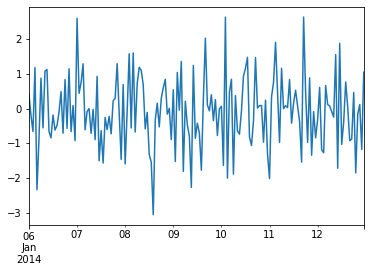

In [3]:
rng = pd.date_range('1/6/2014',periods=169,freq='H')
graph = pd.Series(np.random.randn(168), index=rng[:168])
ax = graph.plot()

weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

xs = sorted(ax.get_xticks(minor='both'))
wd = graph.index[xs - xs[0]].map(pd.Timestamp.weekday)

In [4]:
ax.set_xticks(xs)
ax.set_xticks([], minor=True)
ax.set_xticklabels([weekday_map[d] for d in wd])

[Text(385848, 0, 'MON'),
 Text(385872, 0, 'TUE'),
 Text(385896, 0, 'WED'),
 Text(385920, 0, 'THU'),
 Text(385944, 0, 'FRI'),
 Text(385968, 0, 'SAT')]

In [5]:
ax

<AxesSubplot:>

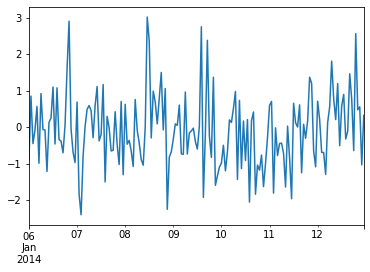

In [7]:
rng = pd.date_range('1/6/2014',periods=169,freq='H')
graph = pd.Series(np.random.randn(168), index=rng[:168])
ax = graph.plot()




In [8]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

xs = sorted(ax.get_xticks(minor='both'))
wd = graph.index[xs - xs[0]].map(pd.Timestamp.weekday)

ax.set_xticks(xs)
ax.set_xticks([], minor=True)
ax.set_xticklabels([weekday_map[d] for d in wd])

[Text(385848, 0, 'MON'),
 Text(385872, 0, 'TUE'),
 Text(385896, 0, 'WED'),
 Text(385920, 0, 'THU'),
 Text(385944, 0, 'FRI'),
 Text(385968, 0, 'SAT')]